In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [3]:
df = pd.read_excel("../../10_DM/Historical 2010-2021/original3.xlsx")

In [4]:
df["Brazil"] = df.country == "Brazil"
df["France"] = df.country == "France"
df["Germany"] = df.country == "Germany"
df["Italy"] = df.country == "Italy"
df["Spain"] = df.country == "Spain"
df["Switzerland"] = df.country == "Switzerland"

df["pol_total"] = df.pol_LH + df.pol_PC
df["lh_anteil"] = df.pol_LH / df.pol_total

#df["soa"] = df.net_invests/df.markt
df.columns

Index(['year', 'quater', 'country', 'net_invests', 'soa', 'pol_LH', 'pol_PC',
       'broker', 'callcenter', 'salaesmen', 'agents', 'webvisits', 'Share_TV',
       'Share_Print', 'Share_OOH', 'Share_Radio', 'Share_Search',
       'Share_Social', 'Consideration', 'PurchaseIntent', 'target_60',
       'target_50', 'Brazil', 'France', 'Germany', 'Italy', 'Spain',
       'Switzerland', 'pol_total', 'lh_anteil'],
      dtype='object')

In [5]:
use_cols = ['net_invests', 'pol_total', 'lh_anteil','Brazil', 'France', 'Germany', 'Italy', 'Spain', 'Switzerland', 'broker', 'callcenter', 
           'salaesmen', 'agents', 'webvisits', "soa", 'Share_TV', 'Share_Print', 'Share_OOH', 'Share_Radio', 'Share_Search', 'Share_Social', "PurchaseIntent"]
#use_cols = ['net_invests', 'markt', 'pol_total', 'lh_anteil', 'Germany', 'agents', 'webvisits', "soa"]
#use_cols = ['net_invests', 'lh_anteil',  'Share_TV',  'Share_Print',  "soa",  'salaesmen', 'agents', 'pol_total']
#use_cols = ['net_invests', 'lh_anteil', 'Germany',  'France', 'Switzerland', 'agents', 'salaesmen', "soa", 'Share_TV']
#use_cols = ['net_invests', 'lh_anteil', "agents", "PurchaseIntent", "Share_TV"]
#use_cols = ['net_invests',  "Share_TV", "agents", 'lh_anteil']

X = df[use_cols].values
y = df["target_50"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
rf = RandomForestRegressor(n_estimators=50, random_state=0)
lm = LinearRegression()
kn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
la = Lasso(alpha=1, max_iter=5000)
rf.fit(X_train,y_train)
lm.fit(X_train,y_train)
kn.fit(X_train,y_train)
gb.fit(X_train,y_train)
la.fit(X_train,y_train)

Lasso(alpha=1, max_iter=5000)

In [8]:
y_hat_rf = rf.predict(X_test)
y_hat_lm = lm.predict(X_test)
y_hat_kn = kn.predict(X_test)
y_hat_gb = gb.predict(X_test)
y_hat_la = la.predict(X_test)

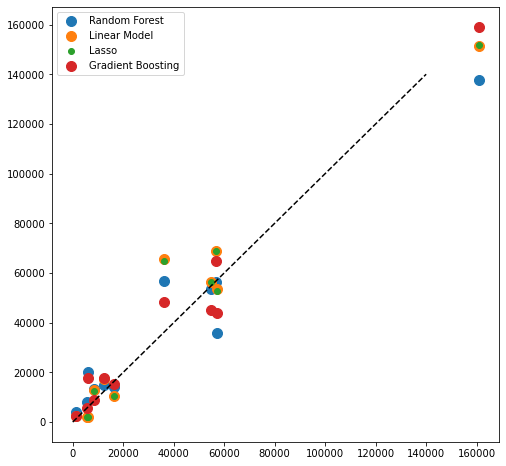

In [9]:
plt.figure(figsize=(8,8))
plt.plot([0,140000], [0,140000], "--k")
plt.scatter(y_test,y_hat_rf, label= "Random Forest", s=100)
plt.scatter(y_test,y_hat_lm, label = "Linear Model", s=100)
plt.scatter(y_test,y_hat_la, label = "Lasso")
plt.scatter(y_test,y_hat_gb, label = "Gradient Boosting", s=100)

plt.legend(loc="upper left");

In [10]:
rsm_rf = np.sqrt(mean_squared_error(y_hat_rf, y_test))
rsm_lm = np.sqrt(mean_squared_error(y_hat_lm, y_test))
rsm_la = np.sqrt(mean_squared_error(y_hat_la, y_test))
rsm_gb = np.sqrt(mean_squared_error(y_hat_gb, y_test))
print(rsm_rf, rsm_lm, rsm_gb, rsm_la)

12221.7001582637 10489.54008133836 7658.7121913978435 10324.924673923784


In [11]:
explained_variance_score(y_hat_rf, y_test), explained_variance_score(y_hat_lm, y_test), explained_variance_score(y_hat_gb, y_test), explained_variance_score(y_hat_la, y_test)

(0.8900450395794235,
 0.9449295124742024,
 0.9686250188820126,
 0.9465098277388565)

In [12]:
for i in range(len(use_cols)):
    print(f"Importance for {use_cols[i]:<15}:  {rf.feature_importances_[i]:.2f}") #{chapt:.<30}{page:.>5}

Importance for net_invests    :  0.68
Importance for pol_total      :  0.04
Importance for lh_anteil      :  0.07
Importance for Brazil         :  0.00
Importance for France         :  0.00
Importance for Germany        :  0.00
Importance for Italy          :  0.00
Importance for Spain          :  0.00
Importance for Switzerland    :  0.00
Importance for broker         :  0.00
Importance for callcenter     :  0.00
Importance for salaesmen      :  0.00
Importance for agents         :  0.10
Importance for webvisits      :  0.02
Importance for soa            :  0.01
Importance for Share_TV       :  0.00
Importance for Share_Print    :  0.01
Importance for Share_OOH      :  0.00
Importance for Share_Radio    :  0.01
Importance for Share_Search   :  0.01
Importance for Share_Social   :  0.00
Importance for PurchaseIntent :  0.03


In [12]:
r2_lm = []
r2_la = []
r2_rf = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lm.fit(X_train, y_train)
    la.fit(X_train, y_train)
    #rf.fit(X_train, y_train)
    y_hat_lm = lm.predict(X_test)
    y_hat_la = la.predict(X_test)
    #y_hat_rf = rf.predict(X_test)
    #r2_rf.append(np.sqrt(mean_squared_error(y_hat_rf, y_test)))
    r2_lm.append(np.sqrt(mean_squared_error(y_hat_lm, y_test)))
    r2_la.append(np.sqrt(mean_squared_error(y_hat_la, y_test)))

mean_lm = np.array(r2_lm).mean()
mean_la = np.array(r2_la).mean()
#mean_rf = np.array(r2_rf).mean()

mean_lm, mean_la, #mean_rf

(8787.784798951328, 8783.968956542029)

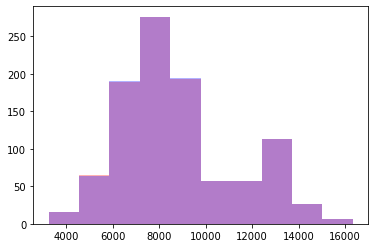

In [13]:
#plt.hist(r2_rf, color=(1,0,0,0.3))
#plt.hist(r2_rf, color=(0,1,0,0.3))
plt.hist(r2_la, color=(1,0,0,0.3))
plt.hist(r2_lm, color=(0,0,1,0.3));

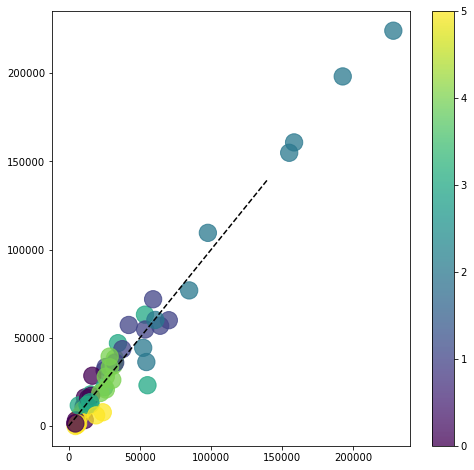

In [14]:
plt.figure(figsize=(8,8))
plt.plot([0,140000], [0,140000], "--k")
plt.scatter(lm.predict(X), y, c=pd.factorize(df.country)[0], s=300, alpha=0.75)
plt.colorbar()

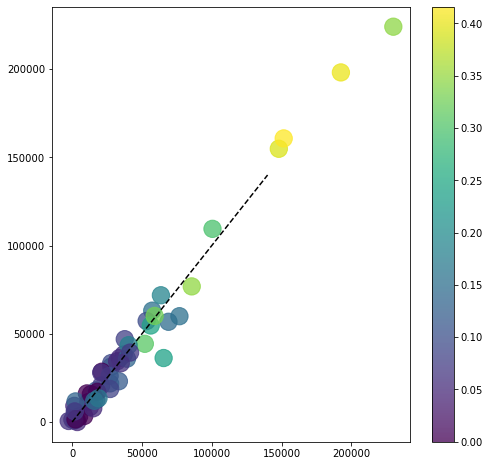

In [13]:
plt.figure(figsize=(8,8))
plt.plot([0,140000], [0,140000], "--k")
plt.scatter(lm.predict(X), y, c=df.lh_anteil, s=300, alpha=0.75)
plt.colorbar()

In [30]:
df["pred_hat"] = lm.predict(X)
df["share_hat"] = df.pred / df.pol_total *100
df["share"] = df.target_60 / df.pol_total *100
df[["year", "quater", "country", "share", "share_hat"]]

,year,quater,country,share,share_hat
0,2021,Q1,Brazil,1.062878,0.652501
1,2021,Q1,France,11.038608,8.848580
2,2021,Q1,Germany,3.031283,3.801857
3,2021,Q1,Italy,2.126773,0.719750
4,2021,Q1,Spain,5.535594,6.543971
5,2021,Q1,Switzerland,1.210870,-0.359327
6,2021,Q2,Brazil,0.366908,0.402527
7,2021,Q2,France,9.726663,10.040512
8,2021,Q2,Germany,9.974665,9.867262
9,2021,Q2,Italy,3.907566,4.544499


In [583]:
# la1 = Lasso(alpha=0.5, max_iter=5000)pol_total
# la5 = Lasso(alpha=5, max_iter=5000)
# la10 = Lasso(alpha=10, max_iter=5000)
# la20 = Lasso(alpha=20, max_iter=5000)

In [584]:
# rmse_lm1 = []
# rmse_lm5 = []
# rmse_lm10 = []
# rmse_lm20 = []


# for i in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=i)
#     la1.fit(X_train, y_train)
#     la5.fit(X_train, y_train)
#     la10.fit(X_train, y_train)
#     la20.fit(X_train, y_train)
    
    
#     y_hat_la1 = la1.predict(X_test)
#     y_hat_la5 = la5.predict(X_test)
#     y_hat_la10 = la10.predict(X_test)
#     y_hat_la20 = la20.predict(X_test)
#     #y_hat_rf = rf.predict(X_test)
#     #r2_rf.append(np.sqrt(mean_squared_error(y_hat_rf, y_test)))
#     rmse_lm1.append(np.sqrt(mean_squared_error(y_hat_la1, y_test)))
#     rmse_lm5.append(np.sqrt(mean_squared_error(y_hat_la5, y_test)))
#     rmse_lm10.append(np.sqrt(mean_squared_error(y_hat_la10, y_test)))
#     rmse_lm20.append(np.sqrt(mean_squared_error(y_hat_la20, y_test)))
    

# mean_la1 = np.array(rmse_lm1).mean()
# mean_la5 = np.array(rmse_lm5).mean()
# mean_la10 = np.array(rmse_lm10).mean()
# mean_la20 = np.array(rmse_lm20).mean()
# #mean_rf = np.array(r2_rf).mean()

# mean_la1, mean_la5, mean_la10, mean_la20

In [585]:
pd.factorize(df.country)[0]

array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5], dtype=int64)